## Computing the Casimir energy between two spheres

In [1]:
import bempp.api
import math
import numpy as np
from numpy.linalg import slogdet
from bempp.api.assembly.blocked_operator import BlockedOperator
bempp.core.opencl_kernels.set_default_device(0,0)

%matplotlib inline
import matplotlib.pyplot as plt

In [72]:
Nk = 20
lbound = .0008    # lower bound of k in ik
ubound = 10   # upper bound of k in ik
quad_points = np.linspace(np.exp(-ubound), np.exp(-lbound), Nk)

In [23]:
for h in [0.2, 0.15, 0.1, 0.07]:
    point1 = 1.5

    center1 = ((point1/2) + 1, 0, 0)
    center2 = (-((point1/2) + 1), 0, 0)

    sphere1 = bempp.api.shapes.sphere(h=h, origin=center1)
    sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)
    
    wavenumber = 0.00008*1j

    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
    mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    print(wavenumber, logdet)

8e-05j 0.05647118468423927
8e-05j 0.0958202276311211
8e-05j -0.01055305270363112


KeyboardInterrupt: 

In [ ]:
8e-05j -
8e-05j -
8e-05j -
8e-05j -

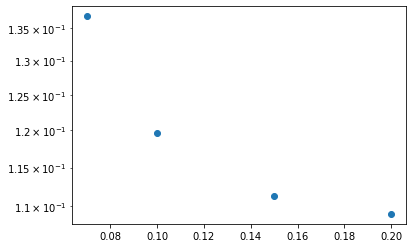

In [24]:
plt.semilogy([0.07,0.1,0.15,0.2], [0.1368126774197944, 0.11961674817640967, 0.11134645981232075, 0.10903908481808183],'o')

In [ ]:
0.8j:

z = 0.5
-0.08623185118437851
-0.0883374917771658
-0.08960310074909261
-0.09022607668784467

z = 1.5

 -0.002917789248269569
 -0.0029686453781176685
 -0.002998594849888021
 -0.0030130111473269743

z = 3
 -7.672546023246708e-05
 -7.793296654406032e-05
 -7.864523963598868e-05
 -7.899053358711217e-05

In [ ]:
0.0008j:

z = 0.5

 -0.10881591902423217
 -0.11128614221117197
 -0.11277058156380106
 -0.11364639450424398

z = 1.5
 -0.00662702957344642
 -0.006732286854889839
 -0.006825883911379545
 -0.006942818902510305

z = 3.0
 -0.0005873641803058412
 -0.0005993704017385508
 -0.0006399427170621324
 -0.0007111593999339823

In [3]:
h_02_00008 = [0.10881591902423217,  0.00662702957344642, 0.0005873641803058412]
h_015_00008 = [0.11128614221117197,  0.006732286854889839, 0.0005993704017385508]
h_01_00008 = [0.11277058156380106, 0.006825883911379545, 0.0006399427170621324]
h_007_00008 = [0.11364639450424398, 0.006942818902510305, 0.0007111593999339823]

h_02_08 = [0.08623185118437851,  0.002917789248269569, 7.672546023246708e-05]
h_015_08 = [0.0883374917771658,  0.0029686453781176685, 7.793296654406032e-05]
h_01_08 = [0.08960310074909261, 0.002998594849888021, 7.864523963598868e-05]
h_007_08 = [0.09022607668784467, 0.0030130111473269743, 7.899053358711217e-05 ]

Alex_00008 = [0.111829, 0.006846, 0.00060442]
Alex_08 = [0.08853, 0.00302625, 0.00007931]

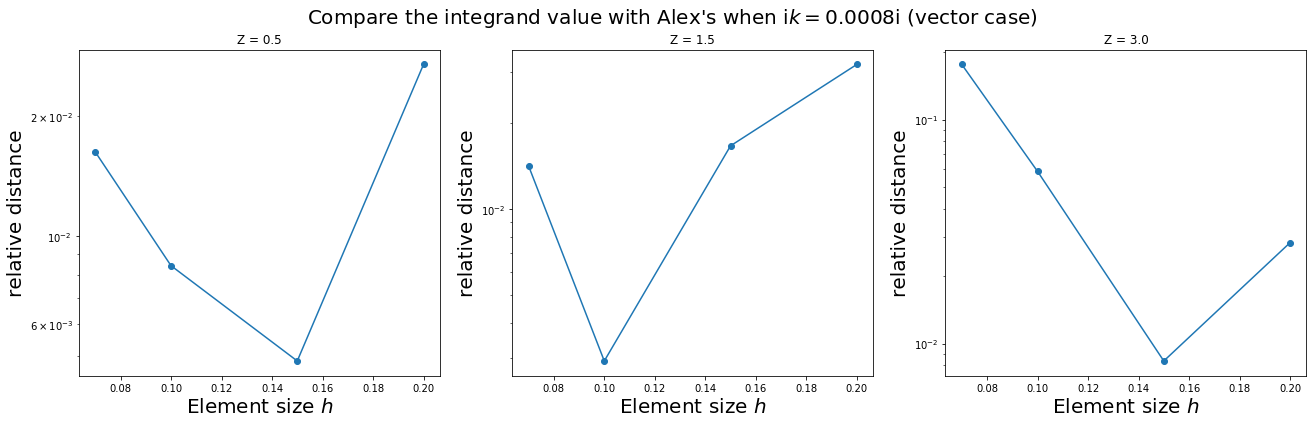

In [12]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_00008[0]-Alex_00008[0])/Alex_00008[0], abs(h_01_00008[0]-Alex_00008[0])/Alex_00008[0], abs(h_015_00008[0]-Alex_00008[0])/Alex_00008[0],abs(h_02_00008[0]-Alex_00008[0])/Alex_00008[0]],'o-')
ax1.set_xlabel('Element size $h$', fontsize = 20)
ax1.set_ylabel('relative distance', fontsize = 20)
ax1.title.set_text('Z = 0.5')

ax2.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_00008[1]-Alex_00008[1])/Alex_00008[1], abs(h_01_00008[1]-Alex_00008[1])/Alex_00008[1], abs(h_015_00008[1]-Alex_00008[1])/Alex_00008[1],abs(h_02_00008[1]-Alex_00008[1])/Alex_00008[1]],'o-')
ax2.set_xlabel('Element size $h$', fontsize = 20)
ax2.set_ylabel('relative distance', fontsize = 20)
ax2.title.set_text('Z = 1.5')

ax3.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_00008[2]-Alex_00008[2])/Alex_00008[2], abs(h_01_00008[2]-Alex_00008[2])/Alex_00008[2], abs(h_015_00008[2]-Alex_00008[2])/Alex_00008[2],abs(h_02_00008[2]-Alex_00008[2])/Alex_00008[2]],'o-')
ax3.set_xlabel('Element size $h$', fontsize = 20)
ax3.set_ylabel('relative distance', fontsize = 20)
ax3.title.set_text('Z = 3.0')

fig.suptitle('Compare the integrand value with Alex\'s when $\mathrm{i}k = 0.0008\mathrm{i}$ (vector case)', fontsize = 20)
fig.savefig('vector h-refine integrand 0.0008.pdf')

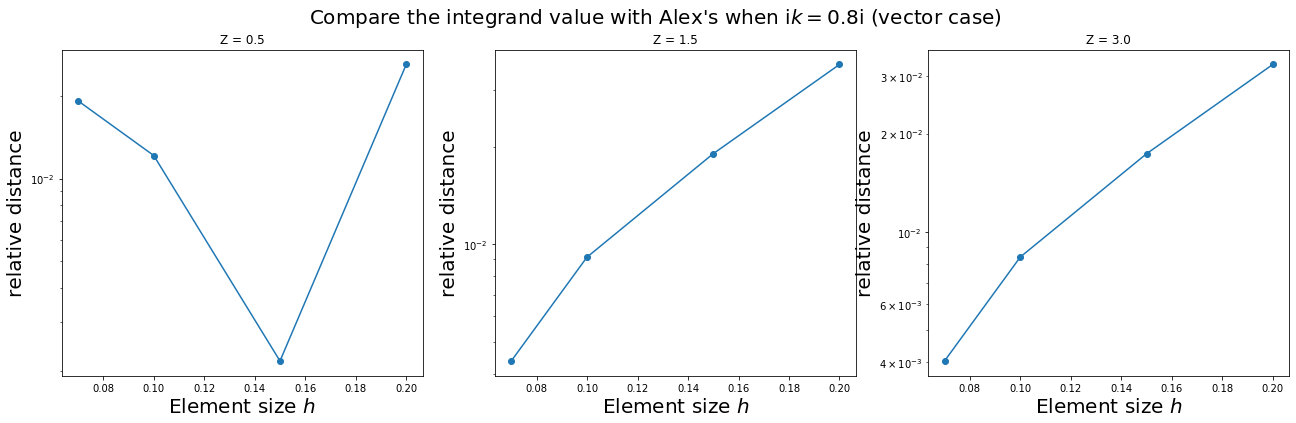

In [13]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_08[0]-Alex_08[0])/Alex_08[0], abs(h_01_08[0]-Alex_08[0])/Alex_08[0], abs(h_015_08[0]-Alex_08[0])/Alex_08[0],abs(h_02_08[0]-Alex_08[0])/Alex_08[0]],'o-')
ax1.set_xlabel('Element size $h$', fontsize = 20)
ax1.set_ylabel('relative distance', fontsize = 20)
ax1.title.set_text('Z = 0.5')

ax2.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_08[1]-Alex_08[1])/Alex_08[1], abs(h_01_08[1]-Alex_08[1])/Alex_08[1], abs(h_015_08[1]-Alex_08[1])/Alex_08[1],abs(h_02_08[1]-Alex_08[1])/Alex_08[1]],'o-')
ax2.set_xlabel('Element size $h$', fontsize = 20)
ax2.set_ylabel('relative distance', fontsize = 20)
ax2.title.set_text('Z = 1.5')

ax3.semilogy([0.07,0.1,0.15,0.2], [abs(h_007_08[2]-Alex_08[2])/Alex_08[2], abs(h_01_08[2]-Alex_08[2])/Alex_08[2], abs(h_015_08[2]-Alex_08[2])/Alex_08[2],abs(h_02_08[2]-Alex_08[2])/Alex_08[2]],'o-')
ax3.set_xlabel('Element size $h$', fontsize = 20)
ax3.set_ylabel('relative distance', fontsize = 20)
ax3.title.set_text('Z = 3.0')

fig.suptitle('Compare the integrand value with Alex\'s when $\mathrm{i}k = 0.8\mathrm{i}$ (vector case)', fontsize = 20)
fig.savefig('vector h-refine integrand 0.8.pdf')

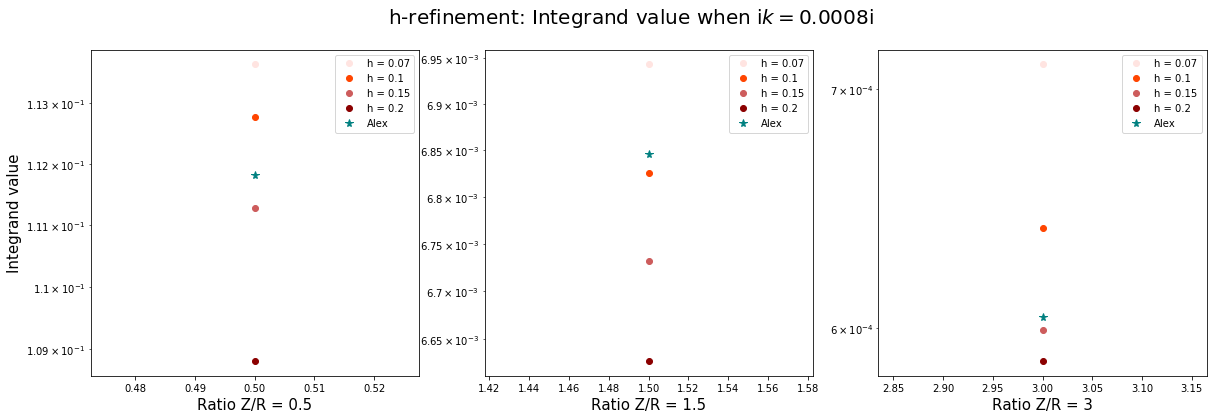

In [4]:
#plt.semilogy([0.07,0.1,0.15,0.2], [h_007_00008[0], h_01_00008[0], h_015_00008[0], h_02_00008[0]],'o')
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax1.semilogy([0.5], [h_007_00008[0]],'o', color = 'mistyrose')
ax1.semilogy([0.5], [h_01_00008[0]], 'o', color = 'orangered')
ax1.semilogy([0.5], [h_015_00008[0]],'o', color = 'indianred')
ax1.semilogy([0.5], [h_02_00008[0]],'o', color = 'darkred')
ax1.semilogy([0.5], [Alex_00008[0]],'*', markersize = '8', color = 'teal')
ax1.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax1.set_xlabel('Ratio Z/R = 0.5', fontsize = 15)
ax1.set_ylabel('Integrand value', fontsize = 15)

ax2.semilogy([1.5], [h_007_00008[1]],'o', color = 'mistyrose')
ax2.semilogy([1.5], [h_01_00008[1]], 'o', color = 'orangered')
ax2.semilogy([1.5], [h_015_00008[1]],'o', color = 'indianred')
ax2.semilogy([1.5], [h_02_00008[1]],'o', color = 'darkred')
ax2.semilogy([1.5], [Alex_00008[1]],'*', markersize = '8', color = 'teal')
ax2.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax2.set_xlabel('Ratio Z/R = 1.5', fontsize = 15)
#ax2.ylabel('Integrand value', fontsize = 15)

ax3.semilogy([3], [h_007_00008[2]],'o', color = 'mistyrose')
ax3.semilogy([3], [h_01_00008[2]], 'o', color = 'orangered')
ax3.semilogy([3], [h_015_00008[2]],'o', color = 'indianred')
ax3.semilogy([3], [h_02_00008[2]],'o', color = 'darkred')
ax3.semilogy([3], [Alex_00008[2]],'*', markersize = '8', color = 'teal')
ax3.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax3.set_xlabel('Ratio Z/R = 3', fontsize = 15)
#ax3.ylabel('Integrand value', fontsize = 15)
fig.suptitle('h-refinement: Integrand value when $\mathrm{i}k = 0.0008\mathrm{i}$', fontsize = 20)


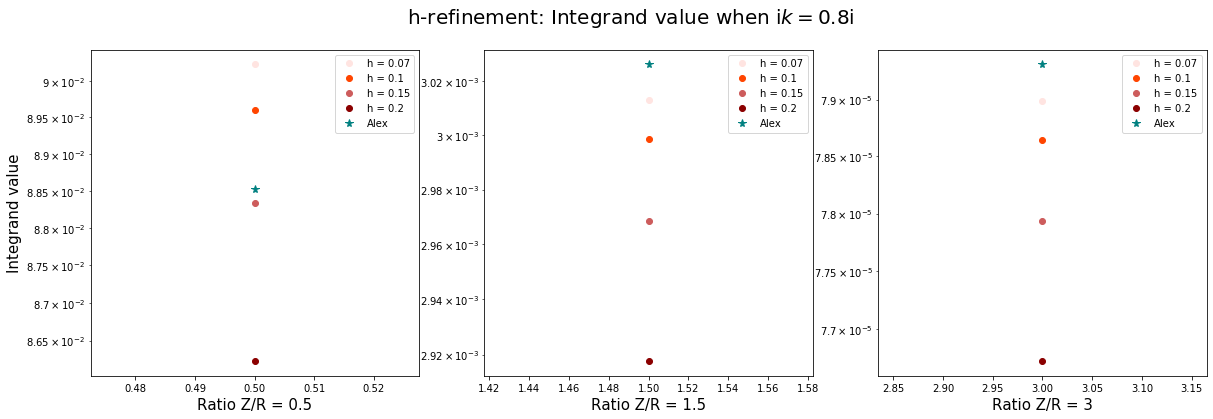

In [5]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax1.semilogy([0.5], [h_007_08[0]],'o', color = 'mistyrose')
ax1.semilogy([0.5], [h_01_08[0]], 'o', color = 'orangered')
ax1.semilogy([0.5], [h_015_08[0]],'o', color = 'indianred')
ax1.semilogy([0.5], [h_02_08[0]],'o', color = 'darkred')
ax1.semilogy([0.5], [Alex_08[0]],'*', markersize = '8', color = 'teal')
ax1.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax1.set_xlabel('Ratio Z/R = 0.5', fontsize = 15)
ax1.set_ylabel('Integrand value', fontsize = 15)

ax2.semilogy([1.5], [h_007_08[1]],'o', color = 'mistyrose')
ax2.semilogy([1.5], [h_01_08[1]], 'o', color = 'orangered')
ax2.semilogy([1.5], [h_015_08[1]],'o', color = 'indianred')
ax2.semilogy([1.5], [h_02_08[1]],'o', color = 'darkred')
ax2.semilogy([1.5], [Alex_08[1]],'*', markersize = '8', color = 'teal')
ax2.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax2.set_xlabel('Ratio Z/R = 1.5', fontsize = 15)
#ax2.ylabel('Integrand value', fontsize = 15)

ax3.semilogy([3], [h_007_08[2]],'o', color = 'mistyrose')
ax3.semilogy([3], [h_01_08[2]], 'o', color = 'orangered')
ax3.semilogy([3], [h_015_08[2]],'o', color = 'indianred')
ax3.semilogy([3], [h_02_08[2]],'o', color = 'darkred')
ax3.semilogy([3], [Alex_08[2]],'*', markersize = '8', color = 'teal')
ax3.legend(['h = 0.07','h = 0.1','h = 0.15','h = 0.2','Alex'])
ax3.set_xlabel('Ratio Z/R = 3', fontsize = 15)
#ax3.ylabel('Integrand value', fontsize = 15)
fig.suptitle('h-refinement: Integrand value when $\mathrm{i}k = 0.8\mathrm{i}$', fontsize = 20)


### Fix the distance between the spheres and change the refinement level

In [4]:
h = 0.07  # size of the mesh (element)

In [16]:
point1 = 3

center1 = ((point1/2) + 1, 0, 0)
center2 = (-((point1/2) + 1), 0, 0)

sphere1 = bempp.api.shapes.sphere(h=h, origin=center1)
sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)

rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

snc1 = bempp.api.function_space(sphere1, "SNC", 0)
snc2 = bempp.api.function_space(sphere2, "SNC", 0)

In [17]:
# Two unit spheres' case 
result_k_sphere_sphere = np.empty(Nk, dtype='float64')

In [18]:
for index2, point2 in enumerate(quad_points):

    wavenumber = -1j*np.log(point2)

    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
    mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    result_k_sphere_sphere[index2] = logdet
    print(wavenumber, logdet)

10j 1.7396084572851521e-12
2.944421460669482j -4.859347368936325e-10
2.251705664919679j -2.8511052408186755e-08
1.8463843931121098j -2.9377470714671833e-07
1.558774246569701j -1.4901542016388877e-06
1.335673853284447j -5.10074036915006e-06
1.1533810695446172j -1.3542267372568252e-05
0.9992509424057592j -3.0010815203884366e-05
0.8657349645747501j -5.794543919434842e-05
0.7479639183664902j -0.00010013232806279665
0.6426129943706615j -0.00015761010041573842
0.5473106623582197j -0.0002286898852694412
0.4603058252422055j -0.0003085101172524829
0.38026865134128873j -0.00038952578333991815
0.30616542244561407j -0.00046311784783537014
0.2371766618005024j -0.0005220368202061922
0.17264173766340357j -0.0005628134780000182
0.11202028968165964j -0.0005868030114553597
0.05486469703655952j -0.0005985806426776719
0.0008000000000000095j -0.0007440037904222342


In [19]:
Casimir_energy_sphere_sphere = np.trapz(-result_k_sphere_sphere / quad_points, quad_points) / (2 * np.pi)
print(Casimir_energy_sphere_sphere)

4.9183784701380487e-05


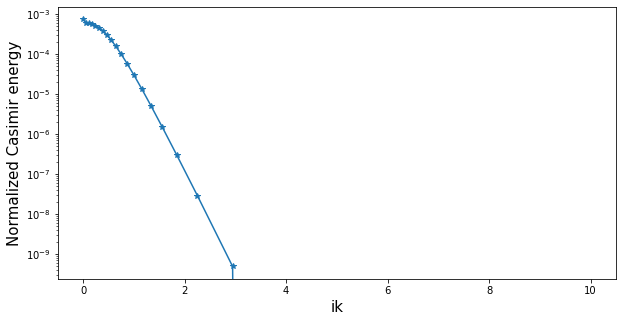

In [20]:
plt.figure(figsize=[10,5])
plt.semilogy(-np.log(quad_points), -result_k_sphere_sphere, '*-')
#plt.semilogy(-np.log(quad_points), np.exp(2*point1*np.log(quad_points)), '*-')
plt.xlabel('ik', fontsize = 15)
plt.ylabel('Normalized Casimir energy', fontsize = 15)
plt.savefig('compensation in vector case.pdf')

In [21]:
def func(x, a, b, c):
    return  a * np.exp(-b * x) + c

In [22]:
xdata = -np.log(quad_points)
ydata = -result_k_sphere_sphere

In [23]:
from scipy.optimize import curve_fit
popt1, pcov1 = curve_fit(func, xdata[-15:], ydata[-15:],maxfev=5000)
#popt1, pcov1 = curve_fit(func, xdata, ydata,maxfev=5000)

print(popt1)

[ 9.15820832e-04  1.39468380e+00 -1.81602506e-04]


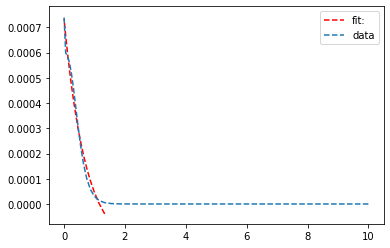

In [24]:
plt.plot(xdata[-15:], func(xdata[-15:], *popt1), 'r--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1)) 
#plt.plot(xdata, func(xdata, *popt1), 'r--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1)) 

#plt.plot(xdata[-15:], -result_k_sphere_sphere[-15:], '--')
plt.plot(xdata, -result_k_sphere_sphere, '--')
plt.legend(['fit:','data'])

In [25]:
extrapolation1 = (-popt1[0]/popt1[1])* (np.exp(-popt1[1]*0.0005)-1) + popt1[2]*0.0005
print(extrapolation1)

3.669495396826114e-07


In [26]:
Casimir_energy_sphere_sphere + extrapolation1

4.9550734241063096e-05

In [ ]:
# h = 0.05 lbound = 0.0005 ubound = 10 Nk = 15

4.857114710432565e-12
-2.400639180515978e-05
-0.00017003992166509562
-0.0005107550597803416
-0.0010717483127983098
-0.0018340367037418838
-0.002739198171662087
-0.003700164974862442
-0.00461864506555168
-0.0054073214035449315
-0.006011358910793823
-0.006420813441205136
-0.006665825632538724
-0.006792749113503897
-0.0031304614696740776

In [ ]:
# h = 0.05 lbound = 0.05 ubound = 4 Nk = 15     0.0008347816215735227
# h = 0.05 lbound = 0.005 ubound = 10 Nk = 15   0.0008839440880102482 + 0.006791591024078004 * 0.005/(2*np.pi) = 0.000889348664424951
# h= 0.05 lbound = 0.0005 ubound = 10 Nk = 15   0.0008676267145901311 + 0.006844663855577464 * 0.0005/(2*np.pi) = 0.0008681713956333399

In [ ]:
0.006853769425774483 k = 0.005
0.006844663855577464 k = 0.0005
0.026719433639992886 k = 0.00005
2.0152150720391 k = 0.000005

0.0005j 0.004962869115152277
5e-05j 288.43982883765057
0.005j 0.006853769425774483

In [ ]:
0.006791591024078004 * 0.005/(2*np.pi) + 0.0008839440880102482

In [ ]:
 0.0008676267145901311 + 0.0031304614696740776 * 0.0005/(2*np.pi)

### Asymptotic formula 

In [ ]:
coeff_list  = [143/16, 0, 7947/160, 2065/32, 27705347/100800, 
               -55251/64, 1373212550401/144506880, -7583389/320, -2516749144274023/44508119040, 274953589659739/275251200 ]

In [ ]:
center_dist = np.linspace(2 + lower_bd, 2 + upper_bd, NZ)

asy_casimir_energy_sphere_sphere = np.empty(NZ, dtype='float64')

for i in range(NZ):
    asy_casimir_energy = 0
    for j in range(len(coeff_list)):
        asy_casimir_energy += (1/center_dist[i]**7) * coeff_list[j] * (1/center_dist[i]**j)
    asy_casimir_energy_sphere_sphere[i] = asy_casimir_energy/np.pi

In [ ]:
asy_casimir_energy_sphere_sphere

In [ ]:
Casimir_energy_sphere_sphere

In [ ]:
asy_casimir_energy_sphere_sphere = [1.27307776e-01, 3.04388845e-02, 8.88097446e-03, 3.12744966e-03,
       1.30285246e-03, 6.23568804e-04, 3.32259784e-04, 1.91799465e-04,
       1.17511850e-04, 7.53229883e-05, 5.00150569e-05, 3.41701231e-05,
       2.39043771e-05, 1.70635980e-05, 1.23958639e-05]

Casimir_energy_sphere_sphere_02 = [2.82217173e-02, 8.71642132e-03, 3.45274474e-03, 1.58781287e-03,8.07319501e-04, 4.42179209e-04, 2.56455693e-04, 1.55743461e-04,
                                   9.81924304e-05, 6.39025190e-05, 4.27275802e-05, 2.92526588e-05,2.04465415e-05, 1.45526805e-05, 1.05296755e-05] 
Casimir_energy_sphere_sphere_01 = [2.94853971e-02, 9.02908591e-03, 3.56088959e-03, 1.63278728e-03, 8.29084949e-04, 4.53560750e-04, 2.62821709e-04, 1.59468781e-04,
                                   1.00490939e-04, 6.53723438e-05, 4.36987549e-05, 2.99088562e-05, 2.08986651e-05, 1.48731473e-05, 1.07598028e-05]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

ref_x = [0.5,1,1.5,2,2.5,3,3.5]
ref_y = [0.03953125, 0.0038125, 0.000775 , 0.0003953125, 0.0001, 0.000055,0.0000325]
plt.semilogy(surf_dist, Casimir_energy_sphere_sphere_02, color = 'salmon', linestyle = '-', marker = 'o')
plt.semilogy(surf_dist, asy_casimir_energy_sphere_sphere, color = 'darkred', linestyle = '-', marker = 'o')
plt.scatter(ref_x, ref_y, s=100, facecolors='none', edgecolors='g')

plt.ylabel('Normalized Casimir Energy h=0.2')
plt.legend(['Bempp (h = 0.05)','Asymptotic series', 'Johnson'])
plt.xlabel('The ratio Z/R')
#plt.savefig('compare_bempp_asym02.pdf')

In [ ]:
ref_x = [0.5,1,1.5,2,2.5,3,3.5]
ref_y = [0.03953125, 0.0038125, 0.000775 , 0.0003953125, 0.0001, 0.000055,0.0000325]
plt.semilogy(surf_dist, Casimir_energy_sphere_sphere_01, color = 'salmon', linestyle = '-', marker = 'o')
plt.semilogy(surf_dist, asy_casimir_energy_sphere_sphere, color = 'darkred', linestyle = '-', marker = 'o')
plt.scatter(ref_x, ref_y, s=100, facecolors='none', edgecolors='g')

plt.ylabel('Normalized Casimir Energy h=0.1')
plt.legend(['Bempp (h = 0.1)','Asymptotic series', 'Johnson'])
plt.xlabel('The ratio Z/R')
plt.savefig('compare_bempp_asym01.pdf')

In [ ]:
relative_error_01 = []
for i in range(len(Casimir_energy_sphere_sphere_01)):
    relative_error_01.append(abs(Casimir_energy_sphere_sphere_01[i] - asy_casimir_energy_sphere_sphere[i])/asy_casimir_energy_sphere_sphere[i])

In [ ]:
test_integrand = []
for index2, point2 in enumerate(np.linspace(0.5, 15, 30)):
    wavenumber = point2*1j

    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
    mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    test_integrand.append(-logdet)

In [ ]:
plt.plot(np.linspace(0.5,15,30),test_integrand)

In [ ]:
test_integrand

In [ ]:
def integrand_value(wavenumber):
    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
    mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    return -logdet

In [ ]:
integrand_value(0.0005*1j)

In [ ]:
10j 4.857114710432565e-12
2.197361262259909j -8.43026709799603e-05
1.50441843018822j -0.0005621828143542206
1.0990214475234847j -0.0015604592666624408
0.811373439533901j -0.0029513528190753344
0.5882503274540094j -0.004423056059498058
0.40594239704836066j -0.005630636448645465
0.25180145046928865j -0.006384246080236555
0.1182773578430768j -0.006734315448267652
0.0004999999999999795j -0.0031304614696740776